# Chunking using custom syntactic rules to extract meaningful descriptions


In [1]:
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
import numpy as np

C:\Users\Tayla\miniconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Tayla\miniconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Tayla\miniconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


# Read in corpus

In [3]:
filename= "C:\\Users\\Tayla\\Documents\\2nd Semester 2020\\Final Project\\10.Oct.Method\\Cardiac Arrest\\CA_all_clean.txt"
      
with open(filename,'r',encoding='utf-8') as file:
    corp=file.readlines()

texts = []
for sentence in corp:
    texts.append(sentence)
#print(texts)

# Splitting text into POS

In [4]:
tagged =[]
for sentence in texts:
# POS tagging with nltk
    nltk_pos_tagged = nltk.pos_tag(sentence.split())
    tagged.append(nltk_pos_tagged)

print(len(tagged))

data_frame = pd.DataFrame(tagged)
data_frame

598


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,"(Hello, NNP)","(Hi, NNP)","(Sir, NNP)","(that, WDT)","(is, VBZ)","(right, JJ)",None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,"(Me, NN)","(I, PRP)","(do, VBP)","(not, RB)","(know, VB)","(what, WP)","(the, DT)","(guy's, NN)","(name, NN)","(is, VBZ)",...,None,None,None,None,None,None,None,None,None,None
2,"(I, PRP)","(drove, VBD)","(either, RB)","(then, RB)","(I, PRP)","(drove, VBD)","(but, CC)","(now, RB)","(I, PRP)","(am, VBP)",...,None,None,None,None,None,None,None,None,None,None
3,"(Oky, NN)",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,"(Yes, UH)","(it, PRP)","(looks, VBZ)","(like, IN)","(the, DT)","(man, NN)","(is, VBZ)","(dead, JJ)",None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,"(Yes, UH)","(Mr, NNP)",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
594,"(Mmm, NNP)","(Mmm, NNP)","(no, DT)","(response, NN)","(mr, NN)",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
595,"(not, RB)","(what, WP)","(I, PRP)","(know, VBP)","(about, IN)","(Mr, NNP)",None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
596,"(He, PRP)","(had, VBD)","(a, DT)","(head, JJ)","(operation, NN)","(many, JJ)","(years, NNS)","(ago, RB)",None,None,...,None,None,None,None,None,None,None,None,None,None


In [5]:
senty = "lethargic dementia hypertention hyperthyroidism"
nltk_pos_tagged = nltk.pos_tag(senty.split())
print(type(nltk_pos_tagged))

<class 'list'>


# Chunking according to rules set 

Example: 
Sentence from corpus: Hello Hi Sir that is right

Syntax tree: 


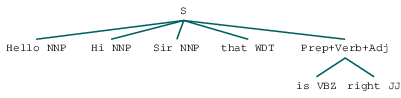

In [7]:
# Grammar Rules

grammar =  """ Prep+Verb+Adj:  {<PRP|DT|NN>?<VB.*|MD><JJ*|VB.*>}
             Verb+Adverb/Adj:  {<VB.*><RB><JJ|VB.?>}
                   Verb+Noun:  {<VB.*><NN.*>} 
                   PRP+VB+CC:  {<PRP|WP><VB.*><.*>*<CC*>}
                      Adj/NN:  {<JJ|NN>}"""

tagged_rule =[]
trees = []
chunk_trees = []
for index,sentence in enumerate(texts):
# POS tagging with nltk
    nltk_pos_tagged = nltk.pos_tag(sentence.split())
    tagged_rule.append(nltk_pos_tagged)
    
for each in range(len(tagged_rule)):
    cp = nltk.RegexpParser(grammar)
    chunk_trees.append(cp.parse(tagged_rule[each]))
    
    
data_frame_rule=pd.DataFrame(tagged_rule)



print('Example: ')
number_line = 0
print("Sentence from corpus: "+texts[number_line])

data_frame_rule 
print('Syntax tree: ')
display(chunk_trees[number_line])


In [8]:
ROOT = 'ROOT'
tree = ...

NP = []
VP = []
PP = []
DN = []
NG = []

def getNodes(parent):
    for node in parent:
        if type(node) is nltk.Tree:
                
            if node.label() == 'Prep+Verb+Adj': 
                NP.append(' '.join(''.join(elems[0]) for elems in node.leaves()))
                #print ("NP: Sentence:", " ".join(node.leaves()))
                
            if node.label() == 'Verb+Adverb/Adj':
                VP.append(' '.join(''.join(elems[0]) for elems in node.leaves()))
                #print ("VP: Sentence:", " ".join(node.leaves()))
                
            if node.label() == 'Verb+Noun':
                PP.append(' '.join(''.join(elems[0]) for elems in node.leaves()))
                #print ("PP: Sentence:", " ".join(node.leaves()))
            if node.label() == 'PRP+VB+CC':
                DN.append(' '.join(''.join(elems[0]) for elems in node.leaves()))
                #print ("PP: Sentence:", " ".join(node.leaves()))
            if node.label() == 'Adj/NN':
                NG.append(' '.join(''.join(elems[0]) for elems in node.leaves()))
                #print ("PP: Sentence:", " ".join(node.leaves()))


            getNodes(node)
        

In [9]:
for chunked in range(len(chunk_trees)):
    getNodes(chunk_trees[chunked])

In [10]:
# NP table of descriptions
NP_dataframe = pd.DataFrame(NP,  columns=['Prep+Verb+Adj'])
#NP_dataframe

#VP  table  of descriptions
VP_dataframe = pd.DataFrame(VP, columns=['Verb+Adverb/Adj'])
#VP_dataframe

#PP table of descriptions
PP_dataframe = pd.DataFrame(PP, columns=['Adj+Noun'])
#PP_dataframe

#VP  table  of descriptions
DN_dataframe = pd.DataFrame(DN, columns=['PRP+VB+CC'])
#DN_dataframe[0:30]

#VP  table  of descriptions
NG_dataframe = pd.DataFrame(NG, columns=['Adj/NN'])
#NG_dataframe[0:60]

In [11]:
# Place the DataFrames side by side
horizontal_stack = pd.concat([NP_dataframe, VP_dataframe,PP_dataframe,DN_dataframe,NG_dataframe], axis=1)
print('Myocardial meaningful sentences:')
horizontal_stack[50:100]

Myocardial meaningful sentences:


,Prep+Verb+Adj,Verb+Adverb/Adj,Adj+Noun,PRP+VB+CC,Adj/NN
50,he drank grandpas,do not know,walking distance,NaN,-ask
51,I will stand,do not know,sir mister,NaN,background-
52,I will wait,does not see,is number,NaN,old
53,I will keep,was also affected,get breathing,NaN,person
54,I am complaining,do not know,know patient,NaN,answers:
55,we will send,is just lying,ambulacne Hello,NaN,unconscious
56,you can help,do not know,lag C,NaN,unconscious
57,we dont know,did not look,is Im,NaN,man
58,Is n,does not help,calling form,NaN,inside
59,I justed called,do not know,NaN,NaN,door


In [12]:
# Combining the meaningful sentences into one array
combined_sepsis = []

for sen in NP:
    combined_sepsis.append(sen)
    
for sen in VP:
    combined_sepsis.append(sen)

for sen in PP:
    combined_sepsis.append(sen)
    
for sen in DN:
    combined_sepsis.append(sen)

#Removing "do not know" sentence from array
while "do not know" in combined_sepsis: combined_sepsis.remove("do not know")
while "" in combined_sepsis: combined_sepsis.remove("")
#print(combined_sepsis)

# Write 'meaningful' sentences to a txt file (for augmentation)

In [13]:
#numpy_array = NP_dataframe['Description'].to_numpy()
#np.savetxt(r"C:\Users\Tayla\Documents\2nd Semester 2020\Final Project\10.Oct.Method\Sepsis\Sepsis_meaningful.txt", numpy_array)


tfile = open("C:\\Users\\Tayla\\Documents\\2nd Semester 2020\\Final Project\\10.Oct.Method\\Cardiac Arrest\\CA_meaningful.txt", 'a')
for each in range(len(combined_sepsis)):
    tfile.writelines(combined_sepsis[each]+'\n')
tfile.close()

# Creating 'file' format for classification model

In [14]:
tfile = open("C:\\Users\\Tayla\\Documents\\2nd Semester 2020\\Final Project\\10.Oct.Method\\Cardiac Arrest\\CA_meaningful", 'a')
for each in range(len(combined_sepsis)):
    tfile.writelines(combined_sepsis[each]+'\n')
tfile.close()